<a href="https://colab.research.google.com/github/Saish31/Python-Projects/blob/main/FootballPlayers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

In this notebook, we will do a comprehensive analysis of FIFA football players, based on various parameters.


# About Dataset

This comprehensive dataset offers detailed information on approximately 17,000 FIFA football players, meticulously scraped from SoFIFA.com.

It encompasses a wide array of player-specific data points, including but not limited to player names, nationalities, clubs, player ratings, potential, positions, ages, and various skill attributes.

# Import Statements

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Read Dataset

In [3]:
df=pd.read_csv('fifa_players.csv')

# Data Cleaning

In [4]:
df.shape

(17954, 51)

In [5]:
df.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

In [6]:
df.isna().values.any()

True

In [7]:
clean_df=df.dropna()

In [8]:
clean_df.shape

(789, 51)

In [9]:
clean_df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
5,V. van Dijk,Virgil van Dijk,7/8/1991,27,193.04,92.1,CB,Netherlands,88,90,...,64,82,88,41,60,62,87,90,89,84


# Top 10 Players

Top 10 players based on overall_rating.

In [10]:
clean_df.sort_values(by=['overall_rating','value_euro'],ascending=False).head(10)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
17944,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,2/5/1985,34,187.96,83.0,"ST,LW",Portugal,94,94,...,93,63,29,95,82,85,95,28,31,23
17943,Neymar Jr,Neymar da Silva Santos Junior,2/5/1992,27,175.26,68.0,"LW,CAM",Brazil,92,92,...,82,56,36,89,88,81,94,27,24,33
17941,K. De Bruyne,Kevin De Bruyne,6/28/1991,27,154.94,69.9,"CAM,CM",Belgium,91,92,...,91,76,61,87,94,79,90,68,58,51
17940,E. Hazard,Eden Hazard,1/7/1991,28,172.72,76.2,"LW,CF",Belgium,91,91,...,80,54,41,87,89,86,91,34,27,22
17938,L. Suárez,Luis Alberto Suárez Díaz,1/24/1987,32,182.88,86.2,ST,Uruguay,91,91,...,85,87,41,92,84,85,85,62,45,38
17942,De Gea,David De Gea Quintana,11/7/1990,28,193.04,76.2,GK,Spain,91,93,...,12,38,30,12,68,40,70,25,21,13
17937,H. Kane,Harry Kane,7/28/1993,25,187.96,88.9,ST,England,90,92,...,86,78,35,93,81,90,91,56,36,38
17935,R. Lewandowski,Robert Lewandowski,8/21/1988,30,182.88,79.8,ST,Poland,90,90,...,84,80,39,91,77,86,86,34,42,19
17934,T. Kroos,Toni Kroos,1/4/1990,29,182.88,76.2,CM,Germany,90,90,...,89,60,76,78,90,73,88,72,74,66


# Highest Rated National Teams

Top 10 national teams with highest total overall_rating.

In [11]:
clean_df.groupby('nationality').overall_rating.sum().sort_values(ascending=False).head(10)

,overall_rating
nationality,
Germany,1933
England,1869
Spain,1861
Netherlands,1843
France,1837
Brazil,1836
Italy,1798
Argentina,1782
Chile,1742


Interesting to note that the likes of Belgium, Uruguay and Portugal do not make the list despite having players in the Top 10 list.


# Top Players by Position

**Top 10 forwards** in the game

In [12]:
clean_df.insert(51, 'Forward', clean_df['finishing']+clean_df['heading_accuracy']+clean_df['volleys']+clean_df['dribbling']+clean_df['curve']+clean_df['ball_control']+clean_df['acceleration']+clean_df['sprint_speed']+clean_df['shot_power']+clean_df['long_shots']+clean_df['penalties'])
clean_df.sort_values(by=['Forward'],ascending=False).head(10)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,Forward
17944,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,2/5/1985,34,187.96,83.0,"ST,LW",Portugal,94,94,...,63,29,95,82,85,95,28,31,23,986
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,48,22,94,94,75,96,33,28,26,968
17924,G. Bale,Gareth Frank Bale,7/16/1989,29,185.42,82.1,"RW,LW,ST",Wales,88,88,...,65,59,85,79,76,86,54,55,52,965
13,A. Griezmann,Antoine Griezmann,3/21/1991,27,175.26,73.0,"CF,ST",France,89,90,...,73,49,91,85,83,89,59,54,48,943
17943,Neymar Jr,Neymar da Silva Santos Junior,2/5/1992,27,175.26,68.0,"LW,CAM",Brazil,92,92,...,56,36,89,88,81,94,27,24,33,939
15,P. Dybala,Paulo Bruno Exequiel Dybala,11/15/1993,25,152.40,74.8,"CAM,RW",Argentina,89,94,...,48,32,84,87,86,84,23,20,20,938
7,S. Agüero,Sergio Leonel Agüero del Castillo,6/2/1988,30,172.72,69.9,ST,Argentina,89,89,...,65,24,92,83,83,90,30,20,12,937
17938,L. Suárez,Luis Alberto Suárez Díaz,1/24/1987,32,182.88,86.2,ST,Uruguay,91,91,...,87,41,92,84,85,85,62,45,38,936
17935,R. Lewandowski,Robert Lewandowski,8/21/1988,30,182.88,79.8,ST,Poland,90,90,...,80,39,91,77,86,86,34,42,19,929
17940,E. Hazard,Eden Hazard,1/7/1991,28,172.72,76.2,"LW,CF",Belgium,91,91,...,54,41,87,89,86,91,34,27,22,927


**Top 10 midfielders** in the game

In [13]:
clean_df.insert(51, 'Midfield', clean_df['dribbling']+clean_df['curve']+clean_df['ball_control']+clean_df['shot_power']+clean_df['long_shots']+clean_df['crossing']+clean_df['short_passing']+clean_df['long_passing']+clean_df['freekick_accuracy']+clean_df['agility']+clean_df['stamina']+clean_df['interceptions']+clean_df['vision']+clean_df['positioning']+clean_df['composure'])
clean_df.sort_values(by=['Midfield'],ascending=False).head(10)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,Midfield,Forward
17941,K. De Bruyne,Kevin De Bruyne,6/28/1991,27,154.94,69.9,"CAM,CM",Belgium,91,92,...,61,87,94,79,90,68,58,51,1303,896
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,22,94,94,75,96,33,28,26,1297,968
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,56,84,91,67,88,59,57,22,1280,863
17934,T. Kroos,Toni Kroos,1/4/1990,29,182.88,76.2,CM,Germany,90,90,...,76,78,90,73,88,72,74,66,1267,848
17943,Neymar Jr,Neymar da Silva Santos Junior,2/5/1992,27,175.26,68.0,"LW,CAM",Brazil,92,92,...,36,89,88,81,94,27,24,33,1259,939
38,Bruno Fernandes,Bruno Miguel Borges Fernandes,9/8/1994,24,152.40,68.9,"CAM,CM",Portugal,84,88,...,71,81,86,82,84,66,66,57,1258,883
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,64,82,88,82,87,63,67,67,1257,901
17940,E. Hazard,Eden Hazard,1/7/1991,28,172.72,76.2,"LW,CF",Belgium,91,91,...,41,87,89,86,91,34,27,22,1252,927
17924,G. Bale,Gareth Frank Bale,7/16/1989,29,185.42,82.1,"RW,LW,ST",Wales,88,88,...,59,85,79,76,86,54,55,52,1250,965
13,A. Griezmann,Antoine Griezmann,3/21/1991,27,175.26,73.0,"CF,ST",France,89,90,...,49,91,85,83,89,59,54,48,1245,943


Interesting to note that Messi is 2nd in both the list of attackers and midfielders 🐐

**Top 10 defenders** in the game

In [14]:
clean_df.insert(51, 'Defense', clean_df['heading_accuracy']+clean_df['short_passing']+clean_df['long_passing']+clean_df['acceleration']+clean_df['sprint_speed']+clean_df['reactions']+clean_df['agility']+clean_df['jumping']+clean_df['strength']+clean_df['aggression']+clean_df['interceptions']+clean_df['positioning']+clean_df['composure']+clean_df['marking']+clean_df['standing_tackle']+clean_df['sliding_tackle'])
clean_df.sort_values(by=['Defense'],ascending=False).head(10)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,Defense,Midfield,Forward
17931,Sergio Ramos,Sergio Ramos García,3/30/1986,32,182.88,82.1,CB,Spain,90,90,...,67,69,82,84,87,89,90,1342,1134,819
17929,N. Kanté,N'Golo Kanté,3/29/1991,27,167.64,72.1,"CDM,CM",France,89,90,...,71,80,54,85,90,91,85,1313,1139,737
24,Jordi Alba,Jordi Alba Ramos,3/21/1989,29,170.18,68.0,LB,Spain,87,87,...,80,76,59,82,74,84,84,1294,1185,822
17881,A. Vidal,Arturo Vidal,5/22/1987,31,154.94,74.8,"CM,CDM",Chile,85,85,...,83,82,81,81,82,86,86,1293,1205,852
17745,T. Delaney,Thomas Delaney,9/3/1991,27,182.88,78.9,"CDM,CM",Denmark,82,83,...,75,77,60,81,80,83,86,1292,1146,808
17874,B. Matuidi,Blaise Matuidi,4/9/1987,31,154.94,74.8,"CDM,CM",France,85,85,...,72,76,56,82,85,84,86,1292,1150,786
17876,A. Witsel,Axel Witsel,1/12/1989,30,187.96,81.2,"CDM,CM",Belgium,85,85,...,75,80,83,92,83,80,85,1290,1186,838
5,V. van Dijk,Virgil van Dijk,7/8/1991,27,193.04,92.1,CB,Netherlands,88,90,...,41,60,62,87,90,89,84,1283,1046,744
17894,Carvajal,Daniel Carvajal Ramos,1/11/1992,27,172.72,73.0,RB,Spain,85,86,...,72,70,45,82,83,83,85,1279,1101,691
17903,Azpilicueta,César Azpilicueta Tanco,8/28/1989,29,152.40,76.2,"RB,CB",Spain,86,86,...,62,74,66,78,88,90,86,1271,1104,733


# Comparing Players Market Value Relative To Age

Do older players earn more or younger ones? Let us find out

Text(0, 0.5, 'value_euro in 100 million')

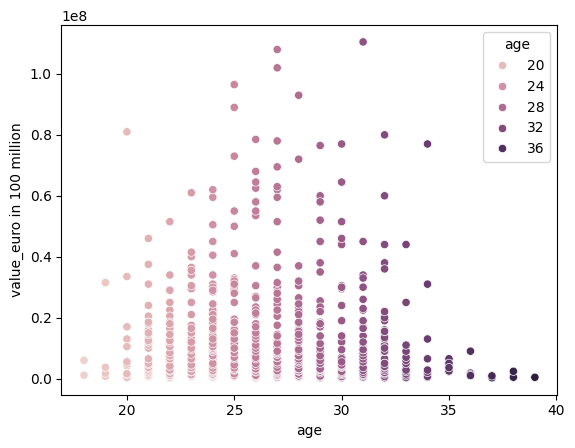

In [24]:
sns.scatterplot(data=clean_df, x='age', y='value_euro',hue='age')
plt.xlabel('age')
plt.ylabel('value_euro in 100 million')

We see that the highest market value occurs between the ages of 27 and 31, which are considered the prime years of a player.

# Comparing Position to Wages

Which position earns the most wages? Surely it's the forwards right?

In [32]:
px.bar(clean_df.groupby('positions').wage_euro.mean().sort_values(ascending=False).reset_index(),x='positions',y='wage_euro',color='positions')

As expected, the forward players command the highest wages, especially the ones who can play in multiple attacking positions.

Fullbacks(LB, RB) are seen to be the lowest paid, with significanty lower wages than the other positions.

# Predicting Player Market Value

Predict a player's market value (value_euro) based on their attributes, such as overall rating, age, and potential.

In [40]:
X = clean_df[['overall_rating', 'age', 'potential']]
y = clean_df['value_euro']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
model = LinearRegression()

In [43]:
model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(X_test)

In [45]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [46]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 78435675659499.23
R-squared (R²): 0.6831992590121332


<ipython-input-49-5ee341eea6dd>:3: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.



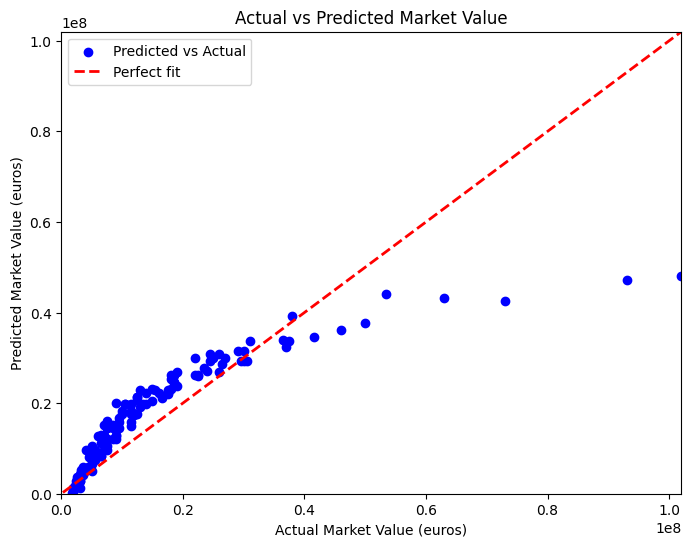

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect fit')
plt.xlim(0, y_test.max())
plt.ylim(0, y_test.max())
plt.xlabel('Actual Market Value (euros)')
plt.ylabel('Predicted Market Value (euros)')
plt.title('Actual vs Predicted Market Value')
plt.legend()
plt.show()

The model provides a moderately strong prediction, but there is room for improvement. Adding more features like international reputation, weekly wage, or club performance data could help capture the remaining variance and improve the model’s accuracy.

The model is struggling to predict very high market values accurately (i.e., the points at the upper range of the graph deviate more), this indicates that the market value of top-tier players may be influenced by additional factors not captured in the model, such as popularity, marketing potential, or external club/transfer dynamics.